In [1]:
# load Providentia interactive class
from providentia import Interactive

In [2]:
# magic to make plots appear inline
%matplotlib inline

In [3]:
# read and filter data from .conf (keeping stations only in Spain)
provi = Interactive(conf='local.conf', subsection="LOCAL·All")

Reading data
SELECTED SPECIES
- Main network-species ['EBAS|sconco3']
Resetting filter
Filtering data


In [4]:
# print .conf
provi.print_config()

[LOCAL]
network = EBAS
species = sconco3
resolution = hourly
start_date = 20180101
end_date = 20190101
experiments = cams61_monarch_ph2-eu-000 (MONARCH)
temporal_colocation = True
spatial_colocation = False
report_type = debug
report_summary = True
report_stations = False
report_title = Providentia Offline Report
report_filename = local
statistic_mode = Temporal|Spatial
statistic_aggregation = Median
periodic_statistic_mode = Independent
periodic_statistic_aggregation = Median
timeseries_statistic_aggregation = Median
harmonise_summary = False
observations_data_label = EBAS
map_extent = -25, 42, 32, 72

    [[All]]

    [[France]]
    country = keep: France ||

    [[Germany]]
    country = keep: Germany ||
  
    [[Spain]]
    country = keep: Spain ||

    [[UK]]
    country = keep: United Kingdom ||


In [5]:
# save data to netCDF
provi.save(format='nc')

Data saved to /home/avilanov/software/Providentia/saved_data/PRV_20240801_1127.nc


In [6]:
# return data in memory (in Xarray format)
data = provi.get_data(format='xr')
data

<xarray.Dataset> Size: 58MB
Dimensions:                                                                        (
                                                                                    time: 8760,
                                                                                    data_label: 2,
                                                                                    ghost_data_variable: 7,
                                                                                    station_EBAS|sconco3: 143,
                                                                                    qa: 79,
                                                                                    flag: 186,
                                                                                    month: 12)
Coordinates:
  * time                                                                           (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month
Data variables: (12/153)
    data_labels                                                                    (data_label) <U7 56B ...
    ghost_data_variables                                                           (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                              (data_label, station_EBAS|sconco3, time) float32 10MB ...
    EBAS|sconco3_ghost_data                                                        (ghost_data_variable, station_EBAS|sconco3, time) float32 35MB ...
    EBAS|sconco3_qa                                                                (qa) float32 316B ...
    EBAS|sconco3_flags                                                             (flag) float32 744B ...
    ...                                                                             ...
    EBAS|sconco3_principal_investigator_name                                       (station_EBAS|sconco3, month) <U21 144kB ...
    EBAS|sconco3_principal_investigator_institution                                (station_EBAS|sconco3, month) <U65 446kB ...
    EBAS|sconco3_principal_investigator_email_address                              (station_EBAS|sconco3, month) <U31 213kB ...
    EBAS|sconco3_contact_name                                                      (station_EBAS|sconco3, month) <U23 158kB ...
    EBAS|sconco3_contact_institution                                               (station_EBAS|sconco3, month) <U65 446kB ...
    EBAS|sconco3_contact_email_address                                             (station_EBAS|sconco3, month) <U30 206kB ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [7]:
# return specific variable in memory
latitude_var = provi.get_var('EBAS|sconco3_latitude')
latitude_var

masked_array(
  data=[[47.76666641, 47.76666641, 47.76666641, ..., 47.76666641,
         47.76666641, 47.76666641],
        [46.677778  , 46.677778  , 46.677778  , ..., 46.677778  ,
         46.677778  , 46.677778  ],
        [48.721111  , 48.721111  , 48.721111  , ..., 48.721111  ,
         48.721111  , 48.721111  ],
        ...,
        [49.15      , 49.15      , 49.15      , ..., 49.15      ,
         49.15      , 49.15      ],
        [49.05      , 49.05      , 49.05      , ..., 49.05      ,
         49.05      , 49.05      ],
        [47.96      , 47.96      , 47.96      , ..., 47.96      ,
         47.96      , 47.96      ]],
  mask=False,
  fill_value=1e+20)

In [8]:
# calculate and return statistics
stat = provi.calculate_stat('r', labela='EBAS', labelb='MONARCH', per_station=True)
stat

array([0.75400785, 0.42835658, 0.7971075 , 0.66276083, 0.62433411,
       0.66477242, 0.72471575, 0.68834806, 0.71163601, 0.70210689,
       0.7402841 , 0.81411676, 0.79450759, 0.61305729, 0.64561631,
       0.63497082, 0.77959916, 0.79451328, 0.76585911, 0.69187517,
       0.59257496, 0.5962231 , 0.62010481, 0.69091902, 0.70694476,
       0.70152916, 0.65399829, 0.80299564, 0.8264883 , 0.74074153,
       0.77958315, 0.79908151, 0.69846308, 0.76399913, 0.80233438,
       0.77045324, 0.72056718, 0.60864075, 0.76911793, 0.80052914,
       0.77040837, 0.59820773, 0.55126806, 0.66541122, 0.56584726,
       0.5342097 , 0.62826311, 0.48007787, 0.58289794, 0.70535508,
       0.56590803, 0.78648858, 0.74066466, 0.75969765, 0.63446848,
       0.6517879 , 0.66810758, 0.54410702, 0.68388747, 0.59514316,
       0.77923287, 0.79920342, 0.5645613 , 0.71175138, 0.71270156,
       0.75368568, 0.53938863, 0.70283975, 0.74432046, 0.35991785,
       0.87054529, 0.63815731, 0.70497188, 0.66342221, 0.63250

In [9]:
# reset filter entirely (meaning all stations are available rather than just Spanish)
provi.reset_filter()

Resetting filter
Filtering data


In [10]:
# filter data for multiple specific stations
provi.select_station(['AT0002R_UVP','SK0007R_UVP'])
stations_data = provi.get_data(format='xr')
stations_data

Filtering data


<xarray.Dataset> Size: 806kB
Dimensions:                                                                        (
                                                                                    time: 8760,
                                                                                    data_label: 2,
                                                                                    ghost_data_variable: 7,
                                                                                    station_EBAS|sconco3: 2,
                                                                                    qa: 79,
                                                                                    flag: 186,
                                                                                    month: 12)
Coordinates:
  * time                                                                           (time) datetime64[ns] 70kB ...
Dimensions without coordinates: data_label, ghost_data_variable,
                                station_EBAS|sconco3, qa, flag, month
Data variables: (12/153)
    data_labels                                                                    (data_label) <U7 56B ...
    ghost_data_variables                                                           (ghost_data_variable) <U39 1kB ...
    EBAS|sconco3_data                                                              (data_label, station_EBAS|sconco3, time) float32 140kB ...
    EBAS|sconco3_ghost_data                                                        (ghost_data_variable, station_EBAS|sconco3, time) float32 491kB ...
    EBAS|sconco3_qa                                                                (qa) float32 316B ...
    EBAS|sconco3_flags                                                             (flag) float32 744B ...
    ...                                                                             ...
    EBAS|sconco3_principal_investigator_name                                       (station_EBAS|sconco3, month) <U17 2kB ...
    EBAS|sconco3_principal_investigator_institution                                (station_EBAS|sconco3, month) <U3 288B ...
    EBAS|sconco3_principal_investigator_email_address                              (station_EBAS|sconco3, month) <U3 288B ...
    EBAS|sconco3_contact_name                                                      (station_EBAS|sconco3, month) <U17 2kB ...
    EBAS|sconco3_contact_institution                                               (station_EBAS|sconco3, month) <U3 288B ...
    EBAS|sconco3_contact_email_address                                             (station_EBAS|sconco3, month) <U3 288B ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [11]:
# reset filter how it was when class was initialised, i.e. Spanish stations again
provi.reset_filter(initialise=True)

Resetting filter
Filtering data


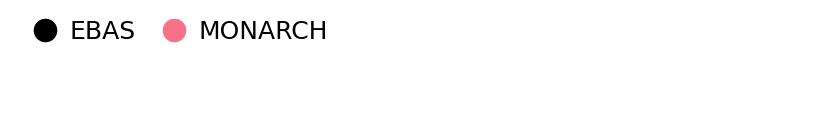

In [12]:
# make a legend plot
provi.make_plot('legend')

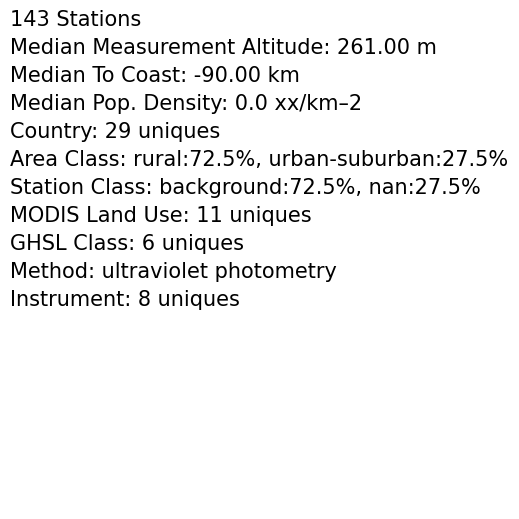

In [13]:
# make a metadata plot
provi.make_plot('metadata')

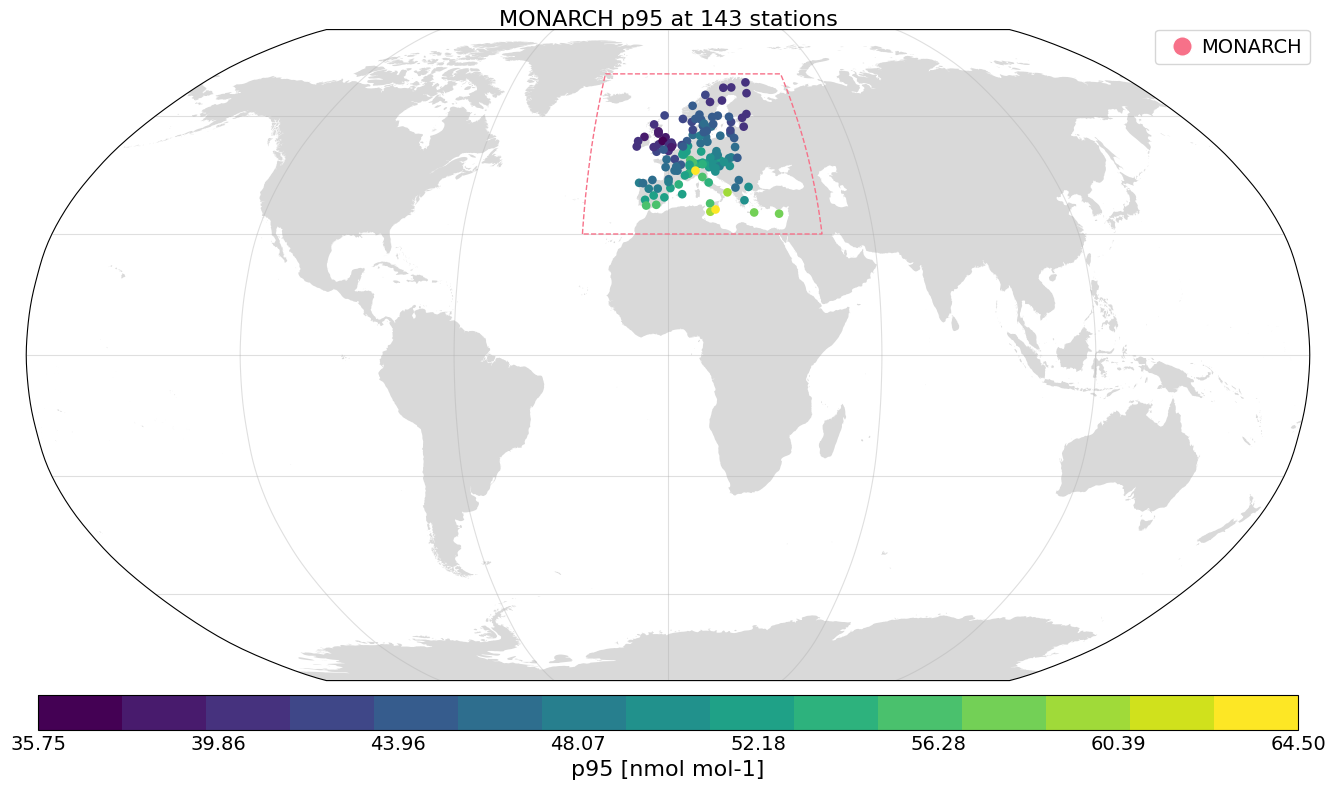

In [14]:
# make a map plot (p95 statistic)
provi.make_plot('map-p95', labela='MONARCH', map_extent=[-180, 180, -90, 90], domain=True)

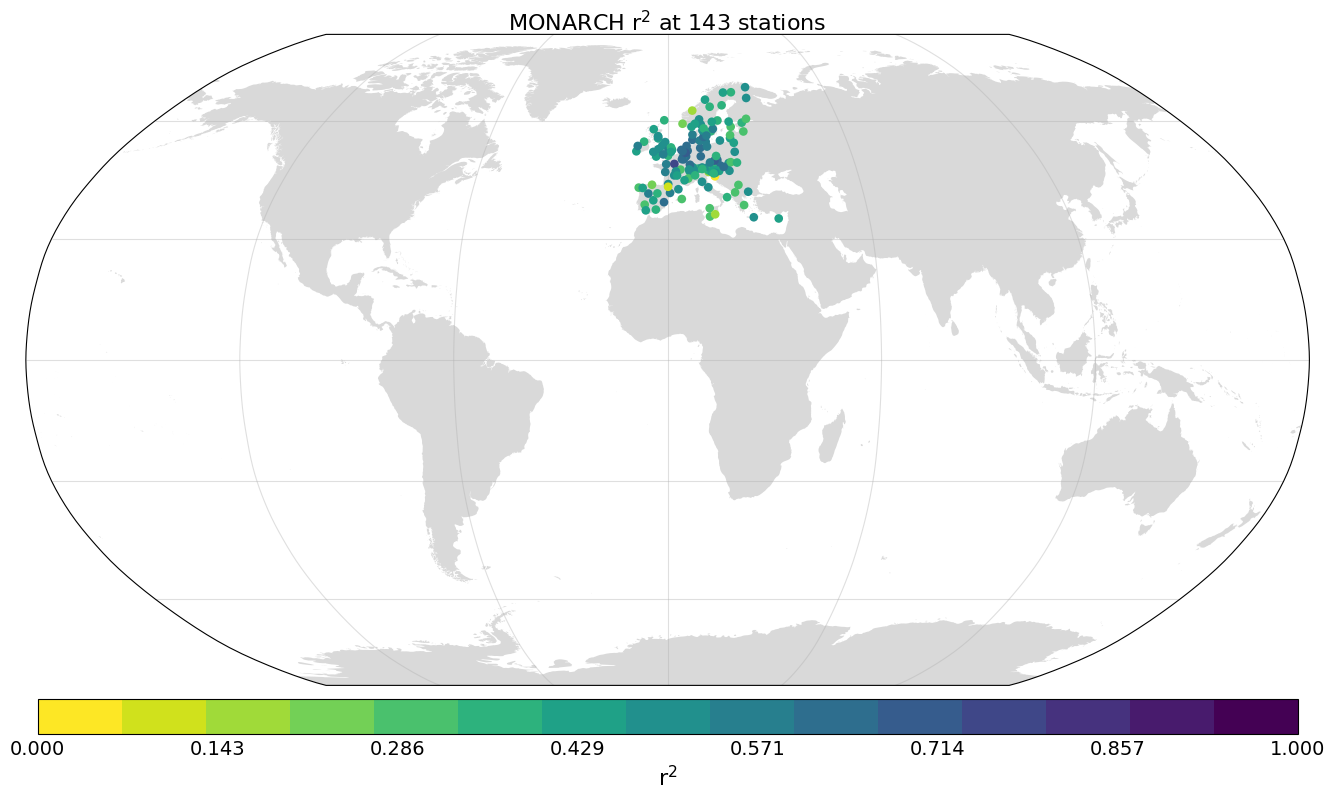

In [15]:
# make a map plot (r2 statistic)
provi.make_plot('map-r2', labela='EBAS', labelb='MONARCH', map_extent=[-180, 180, -90, 90])

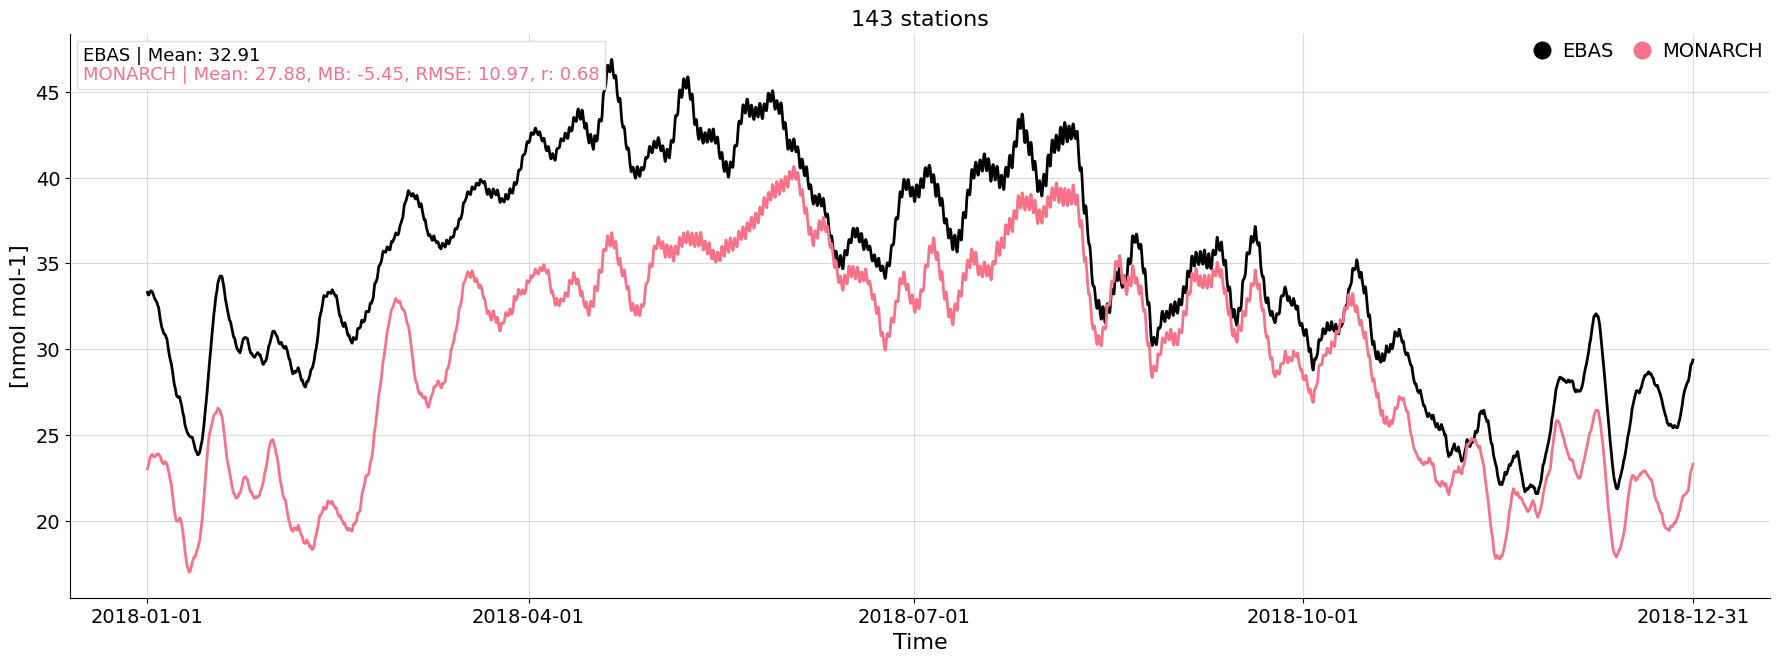

In [16]:
# make a timeseries plot
provi.make_plot('timeseries', annotate=True, smooth=100, hidedata=True)

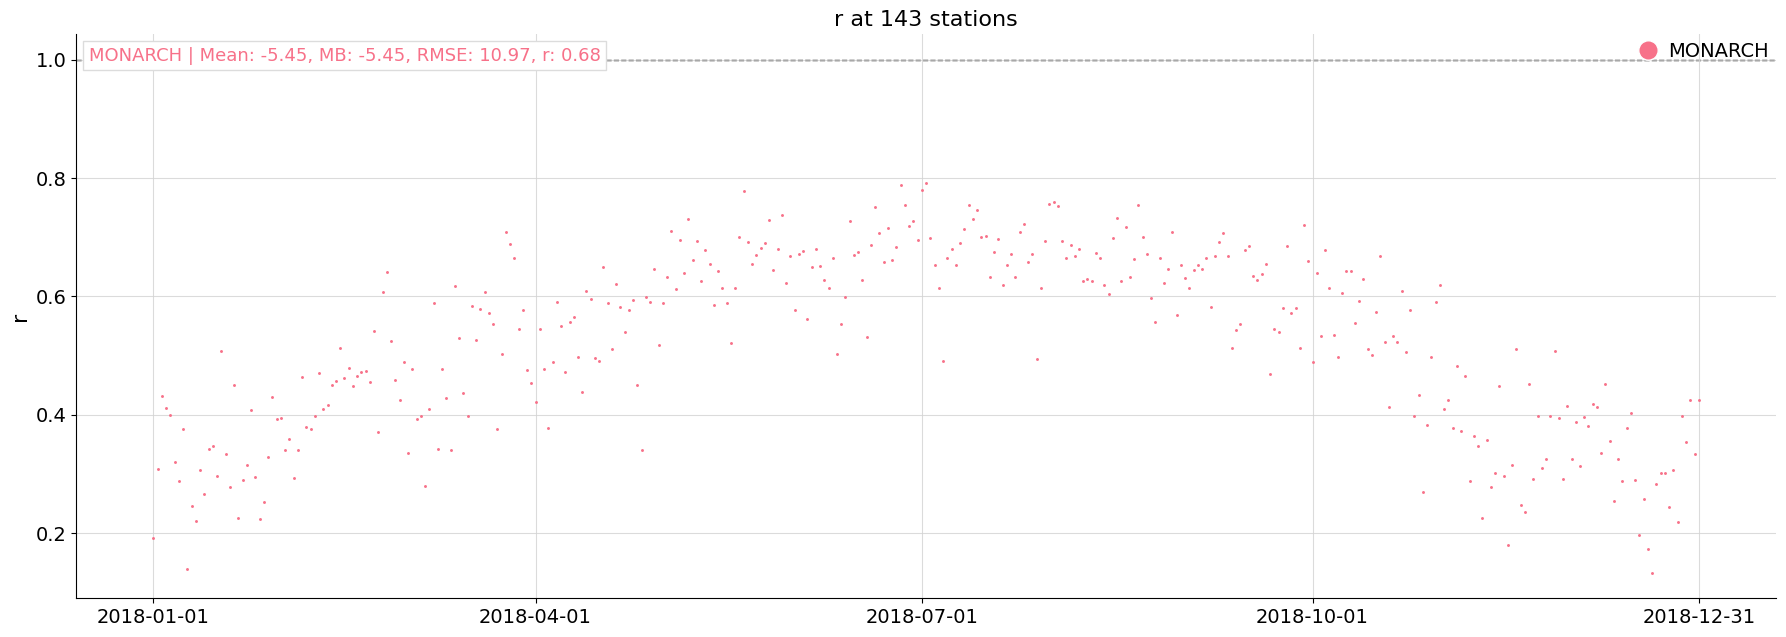

In [17]:
provi.make_plot('timeseries-r-daily', annotate=True)

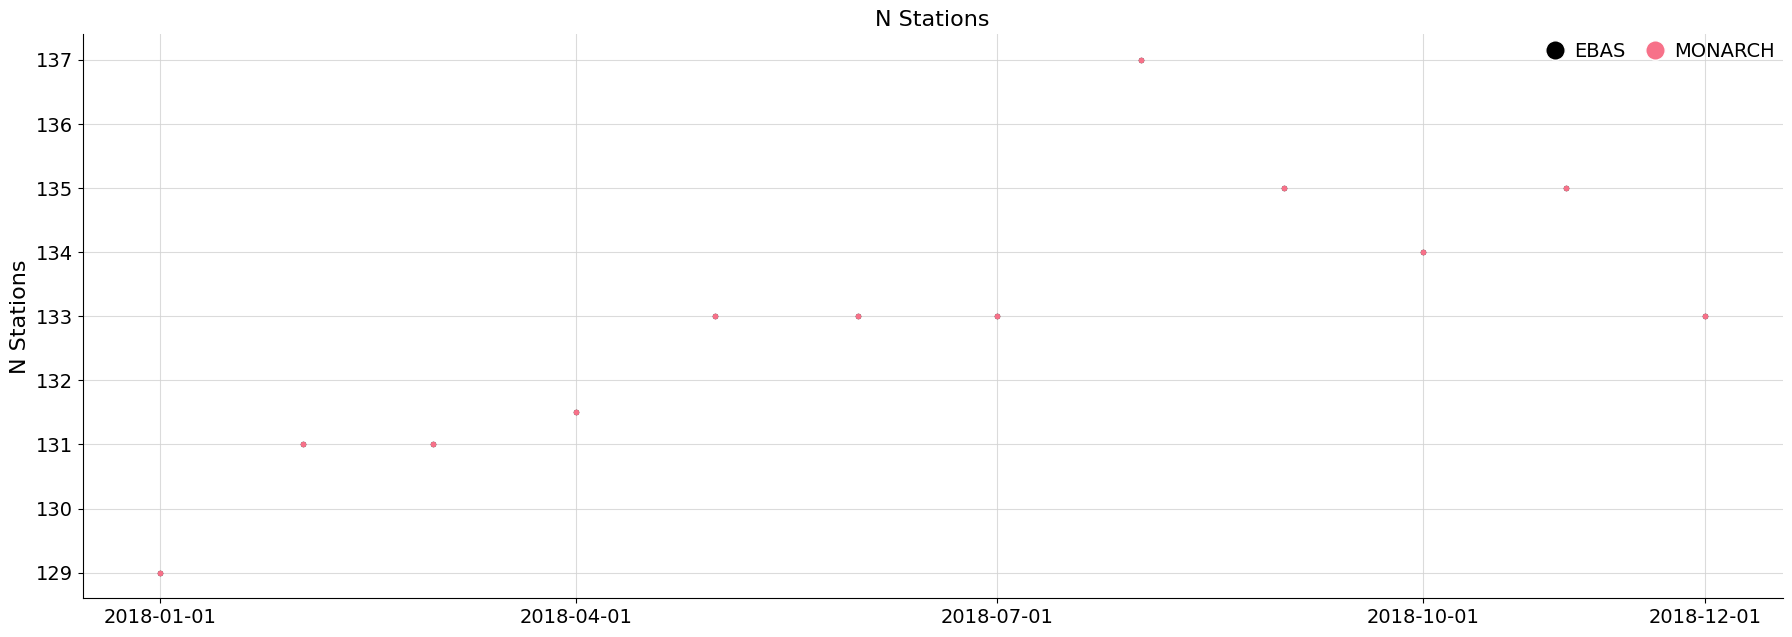

In [18]:
provi.make_plot('timeseries-NStations-monthly')

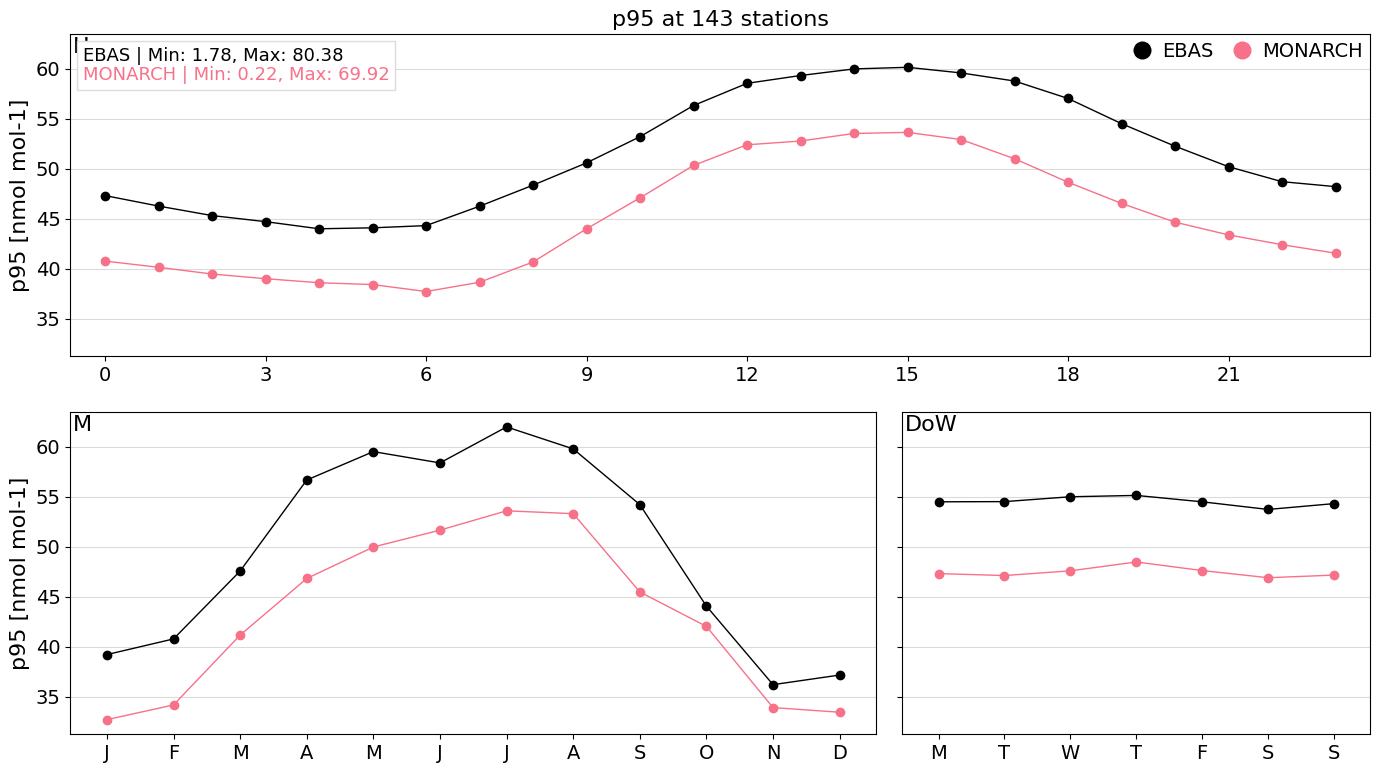

In [19]:
# make a periodic plot (p95 statistic)
provi.make_plot('periodic-p95', plot_options=['annotate'])

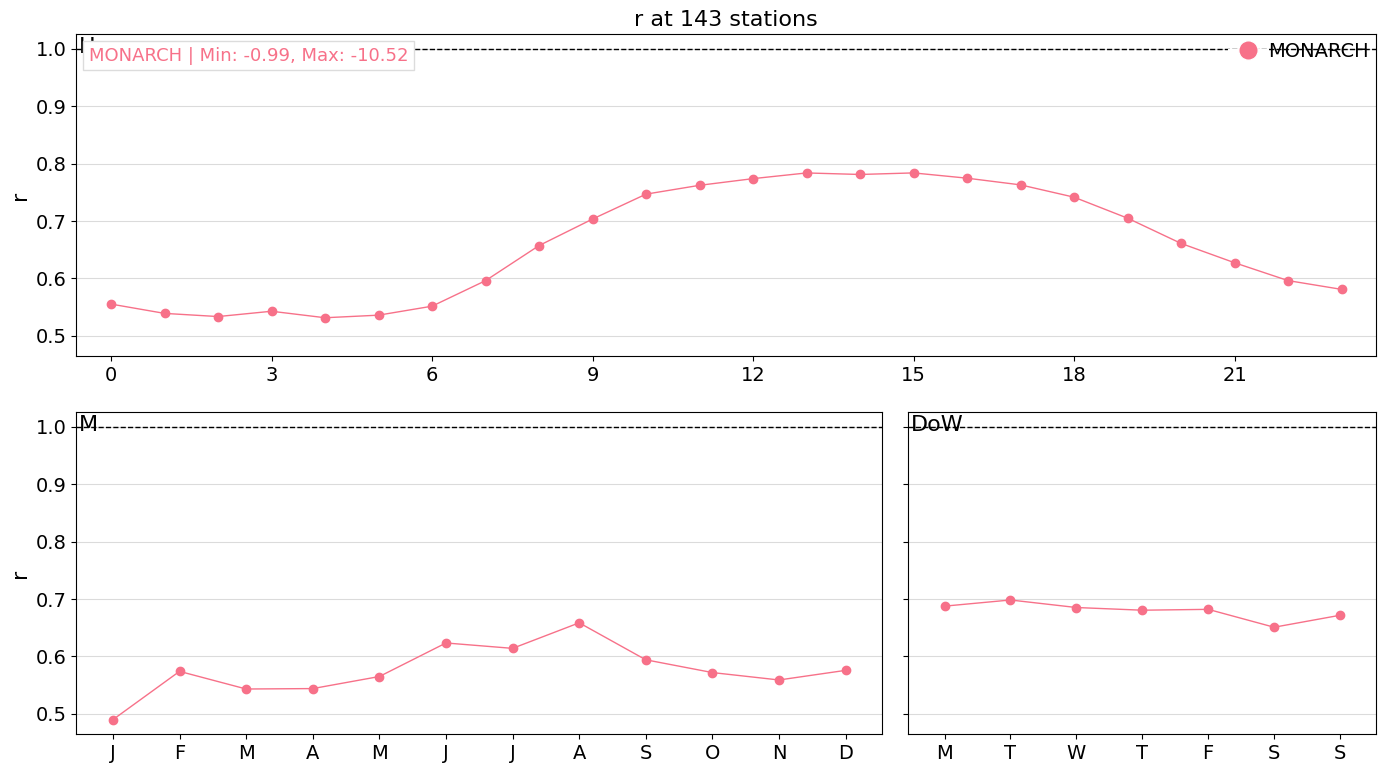

In [20]:
# make a periodic plot (r statistic)
provi.make_plot('periodic-r', plot_options=['annotate'])

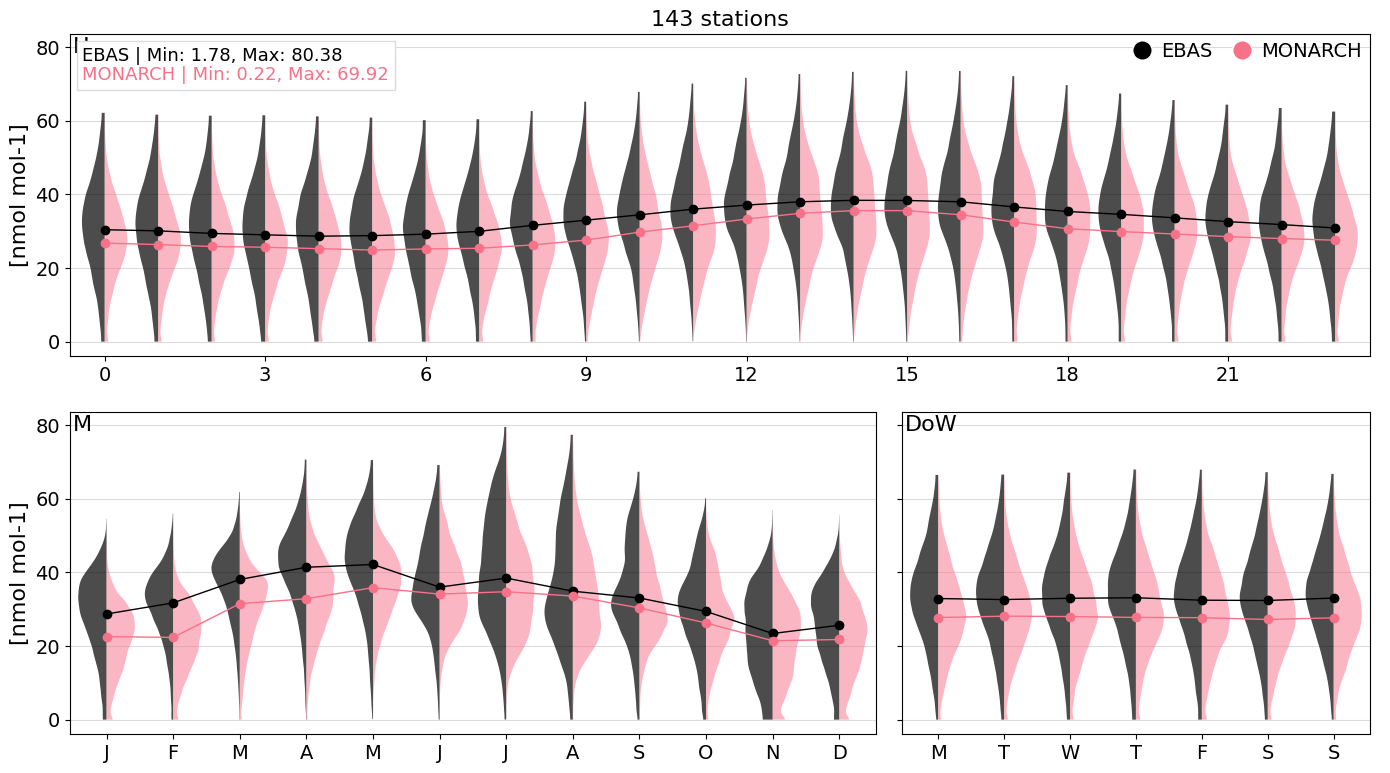

In [21]:
# make a periodic-violin plot
provi.make_plot('periodic-violin', plot_options=['annotate'])

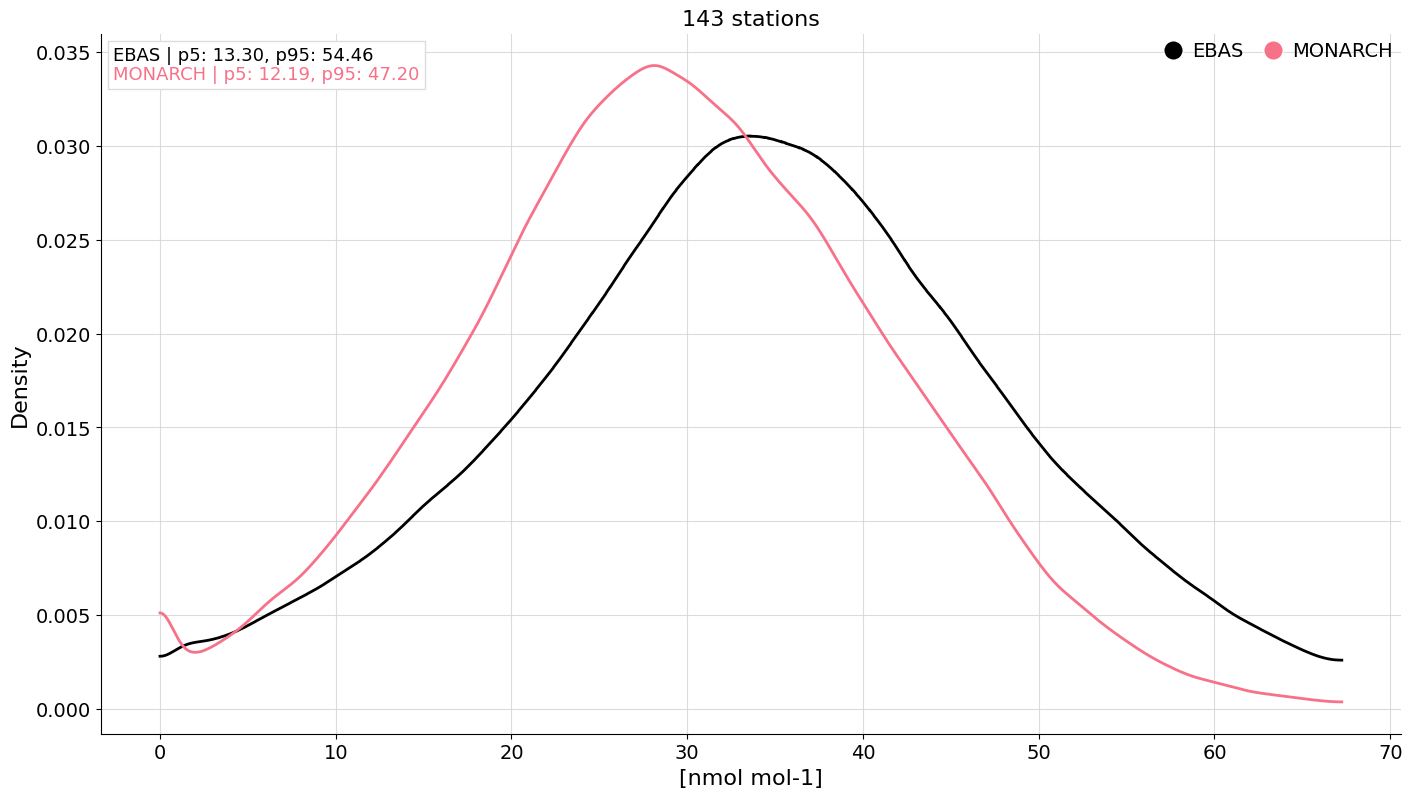

In [22]:
# make a distribution plot
provi.make_plot('distribution', annotate=['p5','p95'])

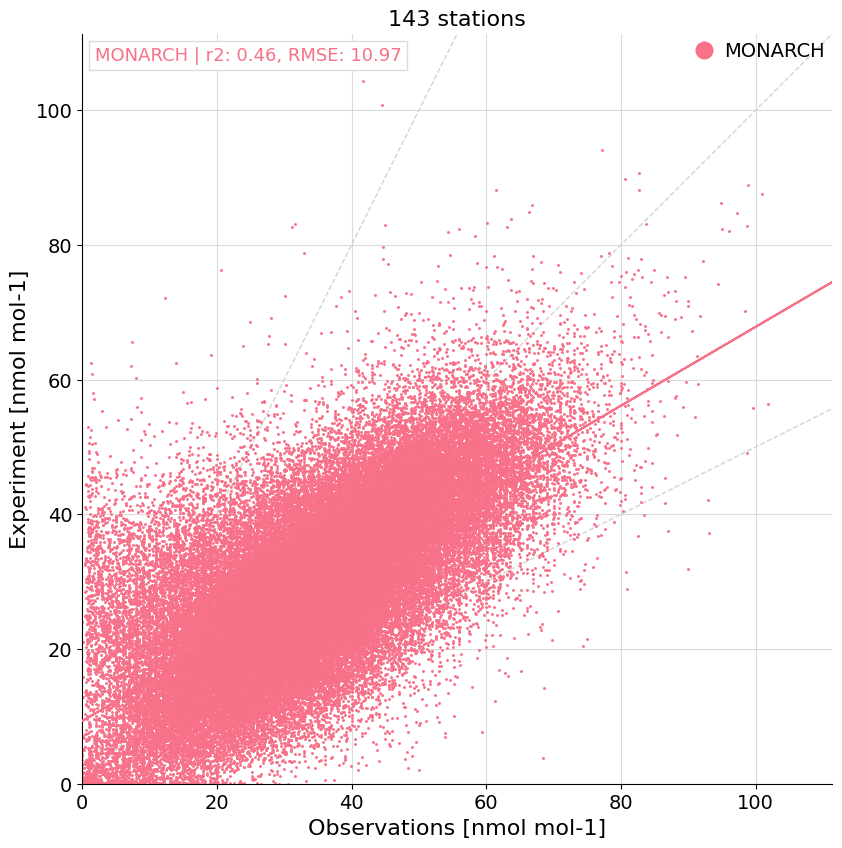

In [23]:
# make a scatter plot
provi.make_plot('scatter', plot_options=['annotate','regression'])

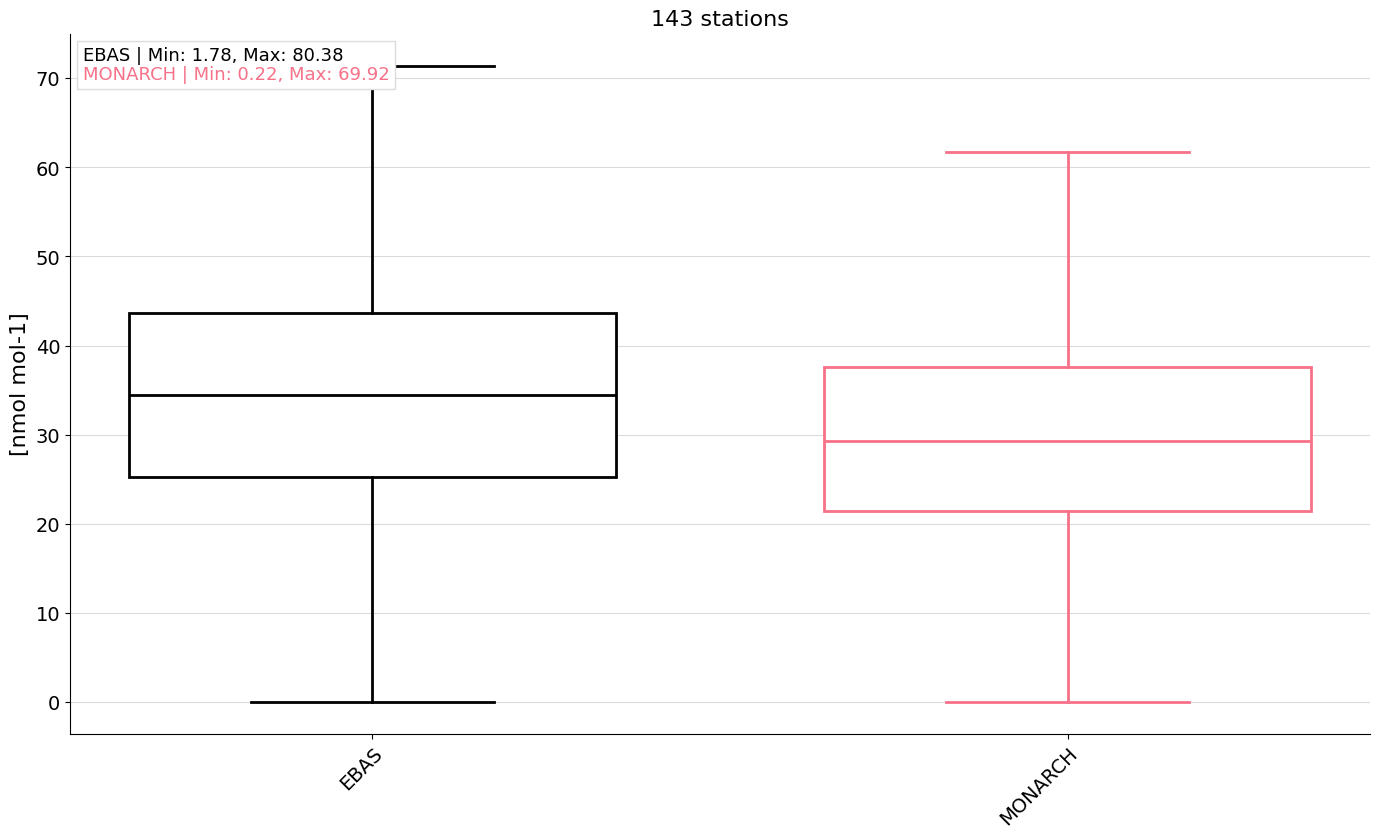

In [24]:
# make a boxplot
provi.make_plot('boxplot', plot_options=['annotate'])

Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data


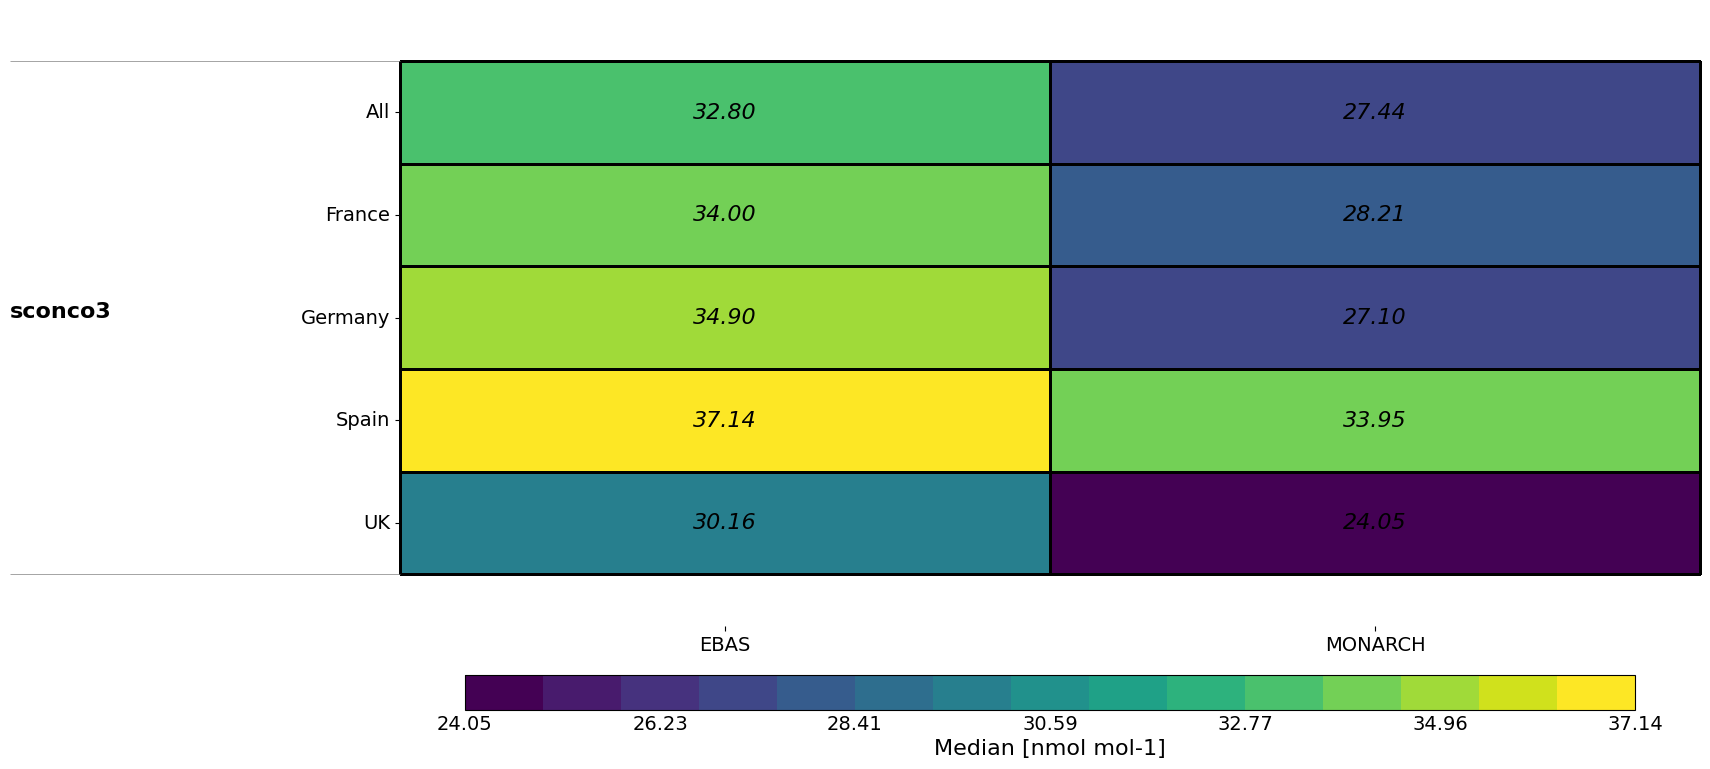

In [25]:
# make a heatmap (Median stat)
provi.make_plot('heatmap-Median', annotate=True, multispecies=True)

Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data


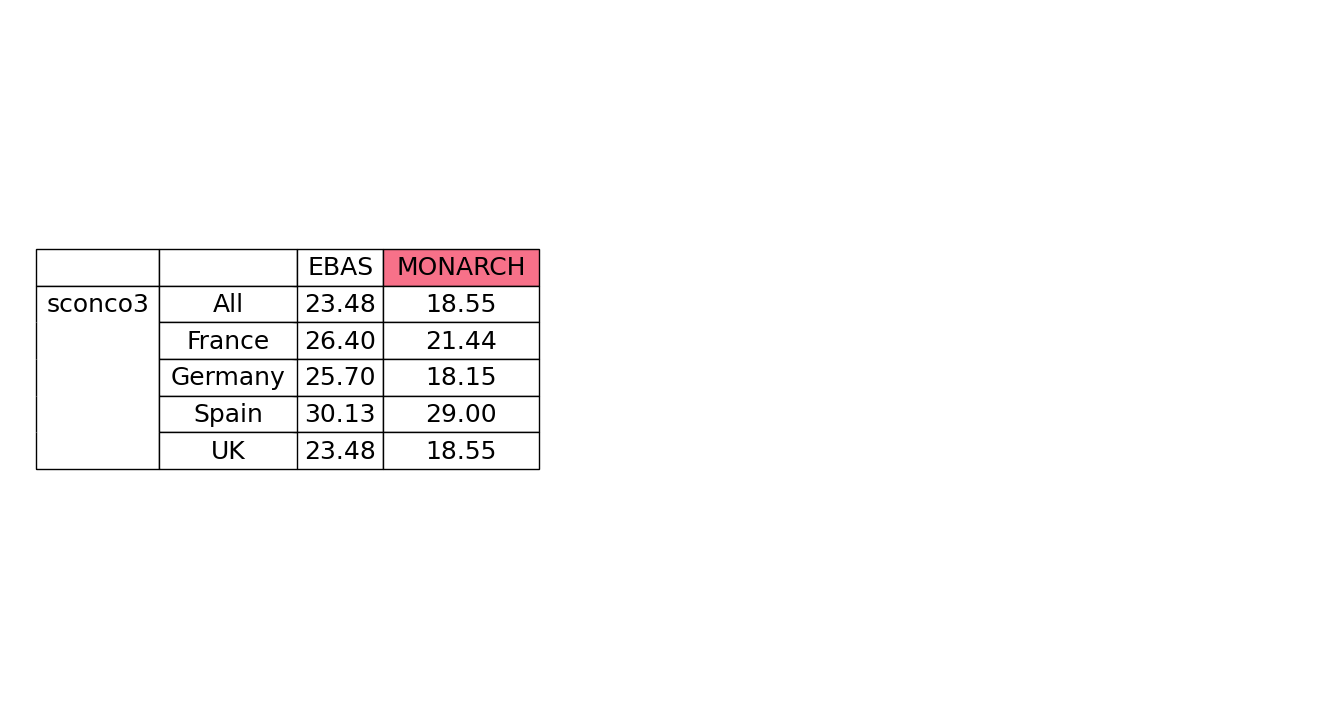

In [26]:
# make a table (p25 stat)
provi.make_plot('table-p25', multispecies=True)

Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data


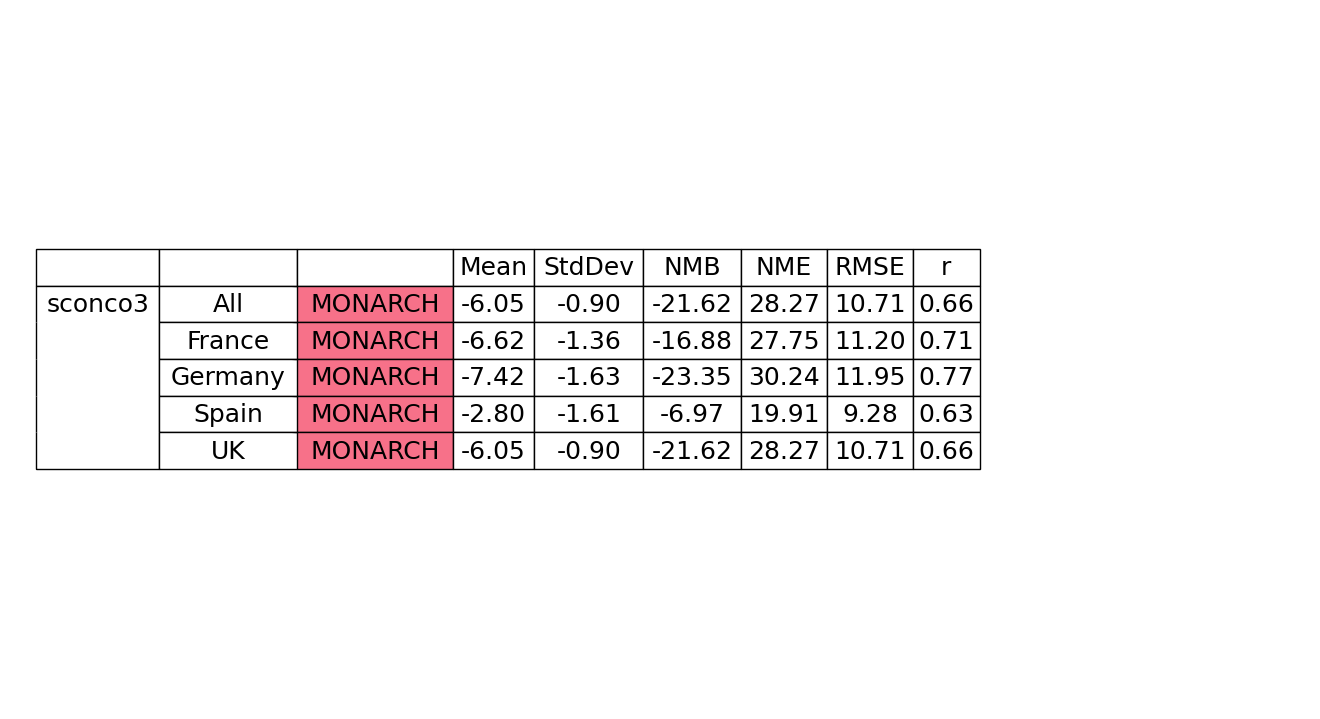

In [27]:
# make a statsummary plot
provi.make_plot('statsummary', multispecies=True, bias=True)

In [28]:
# save a statsummary plot
provi.make_plot('statsummary', multispecies=True, bias=True, save=True)

Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Resetting filter
Filtering data
Saving statsummary_bias_multispecies figure to /home/avilanov/software/Providentia/plots/statsummary_bias_multispecies.png


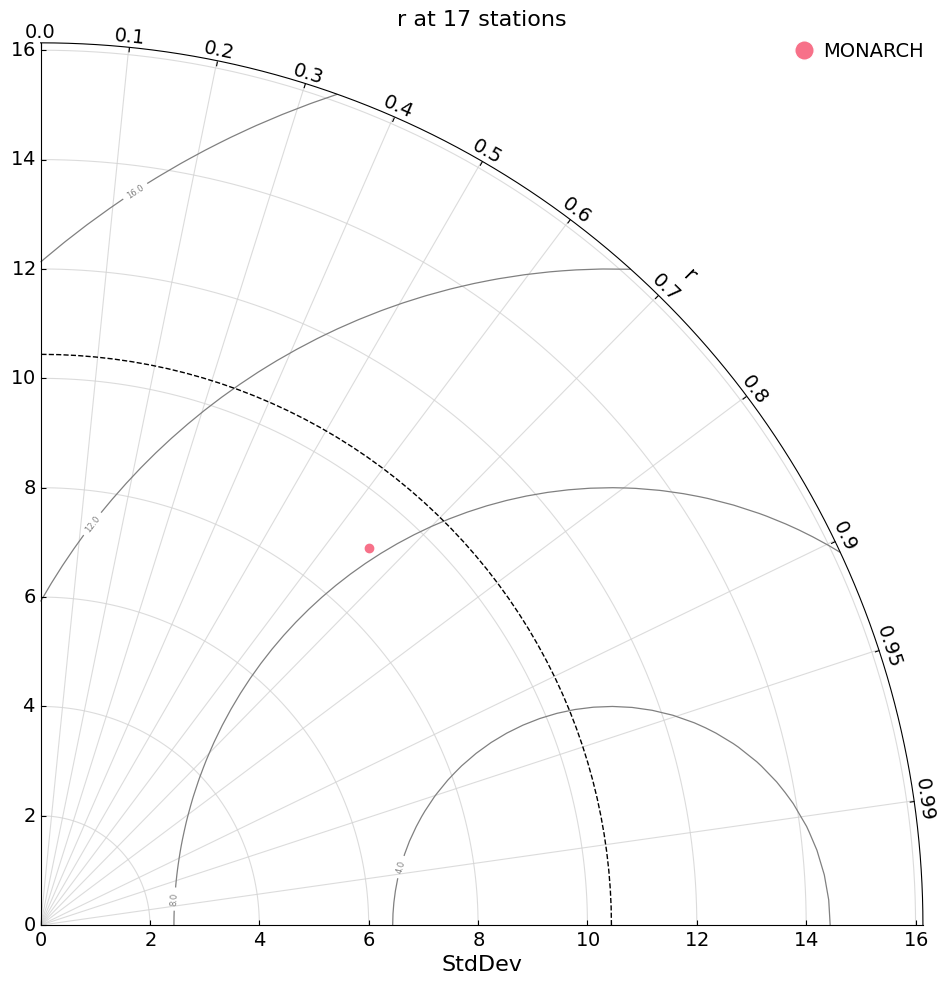

In [29]:
# make a Taylor diagram
provi.make_plot('taylor-r')